## Machine Learning Algorithms 2023
## Homework 4: Using ANNs (80 points)




Name: Last, First

Email:

Kean ID:

Course:


This homework aims to enhance your understanding of the ANN algorithm using the Hand Written Digits Classification dataset: MNIST and a tabular dataset.

## Run each cell and save the results in Google Colab Notebook before submission. You will not get points without saving your results.

## Enable GPU support in Colab to speed up the training process.

Tasks:

[Task 1](#section1) (80 points)

[Extra](#section2) (20 points)


### Task 1: Create an ANN and train it on the MNIST dataset. 80 points <a id = "section1"/>

We introduced the MNIST dataset in Homework 3. Please refer to the notebooks of Homework 3 and Lecture 14 for details.




### Task 1.1: Load dataset (20 points)
   - load the training set and test set of MNIST dataset using PyTorch (10 points). training batch size = 128, test batch size = 1. Hint: use torchvision.datasets.MNIST and torch.utils.data.DataLoader.
   
   - print the number of images in training set (5 points).
   
   - print the number of images in test set (5 points).

In [1]:
# Task 1.1 Load dataset (20 points)
import torch
import numpy as np
import matplotlib.pyplot as plt #using pyplot to display images
import torchvision
from torchvision import datasets, transforms

# 1.load data
###  "------- add your code here -------"

# Define transformations for the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the datasets set
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)



# 2. create the train_loader and test_loader
###  "------- add your code here -------"

#Create the train_loader and test_loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1, shuffle=False)

# Print the number of images in the training set
print(f"Number of images in the training set: {len(train_dataset)}")

# Print the number of images in the test set
print(f"Number of images in the test set: {len(test_dataset)}")



100%|██████████| 9912422/9912422 [00:00<00:00, 110752199.67it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 40786428.90it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 30636534.94it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 23260718.89it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Number of images in the training set: 60000
Number of images in the test set: 10000


### Task 1.2: Create an Network class (20 points).
   - Build Net class: a Feedforward NN with 3 torch.nn.Linear layers following the below instructions (10 points):
        - The first layer has 128 outputs and uses the ReLU() activation function. Think: What is the number of inputs in the first Linear layer?
        - The second layer has 64 outputs and uses the ReLU() activation function.
        - Think: How many outputs should you have in the third layer? Remember: You don't need an activation function in the third layer.
   - Create an object of Net class (4 points).
   - Create a SGD optimizer (4 points). learning rate = 0.01
   - Create a cross entropy loss (2 points).
   
   

In [2]:
import torch.nn as nn
import torch.optim as optim


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        ###  "------- add your code here -------"

        # Input and First hidden layer
        self.fc1 = nn.Linear(in_features=28*28, out_features=128)  # 28*28 is the number of inputs for MNIST images

        # First activation function
        self.relu1 = nn.ReLU()

        # Second layer
        self.fc2 = nn.Linear(in_features=128, out_features=64)

        # Second activation function
        self.relu2 = nn.ReLU()

        # Third layer
        self.fc3 = nn.Linear(in_features=64, out_features=10)  # 10 classes in MNIST, no activation function

        # Hint: DON'T CREATE SOFTMAX HERE!!!!

    def forward(self, x):

        ###  "------- add your code here -------"

        # Define the forward pass
        x = x.view(-1, 28*28)  # Flatten the input
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)
        return x


# Create an object of the network
###  "------- add your code here -------"

model = Net()
# optimizer

###  "------- add your code here -------"

# Create an SGD optimizer with a learning rate of 0.01
optimizer = optim.SGD(model.parameters(), lr=0.01)

# loss

###  "------- add your code here -------"

# Create a cross-entropy loss
criterion = nn.CrossEntropyLoss()

### Task 1.3: Training the network and draw figures (20 points).¶

   - Train 20 epochs, print the average training loss in each epoch. (10 points)
   - Draw a curve for the average training loss in 20 epochs (5 points).
   - Draw a curve for the average test loss in 20 epochs (5 points).
   
Code for plotting is given, please save the training and testing loss properly in epoch_training_loss and epoch_test_loss to draw the two curves. Ensure your code run without errors.
   
   

Epoch 1/20, Average Training Loss: 0.0946
Epoch 1/20, Average Test Loss: 0.1112
Epoch 2/20, Average Training Loss: 0.0921
Epoch 2/20, Average Test Loss: 0.1094
Epoch 3/20, Average Training Loss: 0.0900
Epoch 3/20, Average Test Loss: 0.1128
Epoch 4/20, Average Training Loss: 0.0879
Epoch 4/20, Average Test Loss: 0.1064
Epoch 5/20, Average Training Loss: 0.0858
Epoch 5/20, Average Test Loss: 0.1063
Epoch 6/20, Average Training Loss: 0.0836
Epoch 6/20, Average Test Loss: 0.1053
Epoch 7/20, Average Training Loss: 0.0818
Epoch 7/20, Average Test Loss: 0.1032
Epoch 8/20, Average Training Loss: 0.0797
Epoch 8/20, Average Test Loss: 0.1035
Epoch 9/20, Average Training Loss: 0.0775
Epoch 9/20, Average Test Loss: 0.1036
Epoch 10/20, Average Training Loss: 0.0758
Epoch 10/20, Average Test Loss: 0.0985
Epoch 11/20, Average Training Loss: 0.0742
Epoch 11/20, Average Test Loss: 0.0987
Epoch 12/20, Average Training Loss: 0.0728
Epoch 12/20, Average Test Loss: 0.0951
Epoch 13/20, Average Training Loss

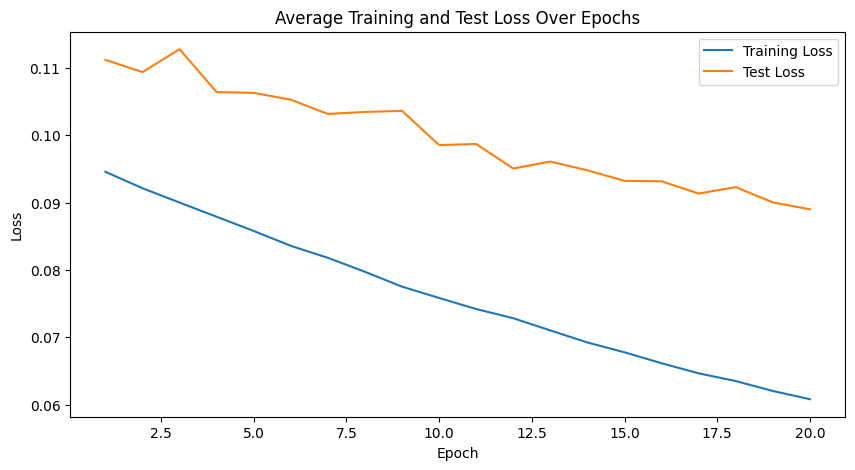

In [5]:
import time
# train the nn
epoch_training_loss = []
epoch_test_loss = []
start_time = time.time()
num_epochs = 20
for epoch in range (num_epochs):
    model.train()
    train_loss = []
    # train the network

    ###  "------- add your code here -------"

    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        running_loss += loss.item()

    # Calculate average training loss for the epoch
    avg_train_loss = running_loss / len(train_loader)
    epoch_training_loss.append(avg_train_loss)

    # Print average training loss for the epoch
    print(f"Epoch {epoch + 1}/{num_epochs}, Average Training Loss: {avg_train_loss:.4f}")


    # predict results for test images:

    model.eval()
    test_loss = []
    ###  "------- add your code here -------"

    running_test_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            test_loss = criterion(outputs, labels)
            running_test_loss += test_loss.item()

    # Calculate average test loss for the epoch
    avg_test_loss = running_test_loss / len(test_loader)
    epoch_test_loss.append(avg_test_loss)
    print(f"Epoch {epoch + 1}/{num_epochs}, Average Test Loss: {avg_test_loss:.4f}")


end_time = time.time()

training_time = end_time - start_time
print("Training Time: {:.2f} seconds".format(training_time))

# Draw curves here

import matplotlib.pyplot as plt

#plt.plot(epoch_training_loss)

#plt.plot(epoch_test_loss)
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), epoch_training_loss, label='Training Loss')
plt.plot(range(1, num_epochs + 1), epoch_test_loss, label='Test Loss')
plt.title('Average Training and Test Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Task 1.4: Evaluation (20 points)

Do the same thing as the Homework 3 Task 5

Question 1: compute the confusion matrix and the accuracy for each class on Test Dataset


In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_test = []

y_test_predict = []

model.eval()
###  "------- add your code here -------"

# Initialize variables to store predicted labels and true labels
all_predicted_labels = []
all_true_labels = []

# Evaluation loop
model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted_labels = torch.argmax(outputs, dim=1).numpy()
        true_labels = labels.numpy()

        all_predicted_labels.extend(predicted_labels)
        all_true_labels.extend(true_labels)

# Convert lists to NumPy arrays for computing confusion matrix
all_predicted_labels = np.array(all_predicted_labels)
all_true_labels = np.array(all_true_labels)

# Compute confusion matrix
conf_matrix = confusion_matrix(all_true_labels, all_predicted_labels)

# Compute accuracy for each class
class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

# Compute overall accuracy
overall_accuracy = accuracy_score(all_true_labels, all_predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print accuracy for each class
print("\nAccuracy for Each Class:")
for class_idx, accuracy in enumerate(class_accuracy):
    print(f"Class {class_idx}: {accuracy * 100:.2f}%")

# Print overall accuracy
print(f"\nOverall Accuracy: {overall_accuracy * 100:.2f}%")


Confusion Matrix:
[[ 962    0    2    1    1    5    6    1    0    2]
 [   0 1124    3    1    0    1    3    1    2    0]
 [   4    1 1008    2    4    0    4    6    3    0]
 [   0    0    7  988    0    1    0    7    5    2]
 [   0    0    6    0  955    0    4    3    2   12]
 [   5    1    0    8    2  861    7    2    4    2]
 [   5    3    1    1    3    5  936    1    3    0]
 [   2    8   11    2    1    0    0 1000    2    2]
 [   4    1    3    3    3    5    8    4  942    1]
 [   4    4    2   11   15    4    1    7    0  961]]

Accuracy for Each Class:
Class 0: 98.16%
Class 1: 99.03%
Class 2: 97.67%
Class 3: 97.82%
Class 4: 97.25%
Class 5: 96.52%
Class 6: 97.70%
Class 7: 97.28%
Class 8: 96.71%
Class 9: 95.24%

Overall Accuracy: 97.37%


Question 2 (10 Points): Finish the Comparison Table in Using Markdown

show performance and training time for ANN

## Answer this question: comparing LR, KNN and SVM in Homework 3 with ANN in this homework, which one do you think is the best?

| Model | 0   | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   | 9   | Train Time|
|-------|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|

In [9]:
# Type your answers here
##

lr_accuracy = [0.98, 0.98, 0.88, 0.91, 0.93, 0.86, 0.95, 0.92, 0.87, 0.88]
svm_accuracy = [0.99, 0.99, 0.97, 0.99, 0.98, 0.98, 0.99, 0.97, 0.98, 0.96]
knn_accuracy = [0.99, 1.00, 0.96, 0.97, 0.96, 0.97, 0.99, 0.96, 0.94, 0.95]
ann_accuracy = class_accuracy

train_time_lr = 128.23
train_time_svm = 295.94
train_time_knn =  0.01
train_time_ann = training_time


# Create the Markdown table
table_header = "| Model | " + " | ".join(map(str, range(10))) + " | Train Time |\n"
table_line = "|-------|-" + "-|-".join(["---" for _ in range(11)]) + "|\n"

lr_row = f"| LR    | {' | '.join(map(lambda x: f'{x:.2f}', lr_accuracy))} | {train_time_lr:.2f} s    |\n"
svm_row = f"| SVM   | {' | '.join(map(lambda x: f'{x:.2f}', svm_accuracy))} | {train_time_svm:.2f} s    |\n"
knn_row = f"| KNN   | {' | '.join(map(lambda x: f'{x:.2f}', knn_accuracy))} | {train_time_knn:.2f} s      |\n"
ann_row = f"| ANN   | {' | '.join(map(lambda x: f'{x:.2f}', ann_accuracy))} | {train_time_ann:.2f} s    |\n"

markdown_table = table_header + table_line + lr_row + svm_row + knn_row + ann_row + table_line

# Print or save the Markdown table
print(markdown_table)

| Model | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | Train Time |
|-------|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|----|
| LR    | 0.98 | 0.98 | 0.88 | 0.91 | 0.93 | 0.86 | 0.95 | 0.92 | 0.87 | 0.88 | 128.23 s    |
| SVM   | 0.99 | 0.99 | 0.97 | 0.99 | 0.98 | 0.98 | 0.99 | 0.97 | 0.98 | 0.96 | 295.94 s    |
| KNN   | 0.99 | 1.00 | 0.96 | 0.97 | 0.96 | 0.97 | 0.99 | 0.96 | 0.94 | 0.95 | 0.01 s      |
| ANN   | 0.98 | 0.99 | 0.98 | 0.98 | 0.97 | 0.97 | 0.98 | 0.97 | 0.97 | 0.95 | 372.44 s    |
|-------|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|----|



### Extra: Breast cancer detection using ANN. 20 Extra points <a id = "section2"/>

In this task, we will use ANN to classify the Breast cancer detection dataset

## This task will help you understand that the ANN can be used on NON-IMAGE DATASETS.

Dataset

    - Number of data samples: 569
    
    - Number of features: 30 numeric. The first 10 features were directly calculated using mean feautues of all nuclei in an image
    
    - Class labels
        - Malignant (0)
        - Benign (1)
        
    https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset

### Task: Design an ANN to classify Breast cancer detection dataset (20 points)
   - Read the loading the training set and testing sets code.
   - Starter code is given below. Don't change anything in the following cell. Read and understand how to load a dataset into pytorch.
   - The feature vector is 1*30 in torch tensor data structure

In [10]:
# Read the program in this cell to see how to load a dataset into pytorch
# don't change anything in this cell.
# load the training set and test set.

import torch
import numpy as np
import torch.utils.data as data
from torchvision import datasets, transforms
import sklearn.datasets as ds
from sklearn.model_selection import train_test_split


breast_ds = ds.load_breast_cancer()

X = breast_ds.data
y = breast_ds.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


# Dataset class

class BreastCancer(data.Dataset):
    def __init__(self, feature, label):
        self.feature = feature
        self.label = label

    def __getitem__(self, index):
        f = torch.from_numpy(self.feature[index].reshape(1, self.feature.shape[1])).float()
        l = torch.from_numpy(self.label)[index]
        return f, l

    def __len__(self):
        return self.feature.shape[0]

# load training set and test set to Torch dataset
train_dataset_b = BreastCancer(X_train, y_train)
test_dataset_b = BreastCancer(X_test, y_test)

train_loader_b = torch.utils.data.DataLoader(train_dataset_b, batch_size=64, shuffle=True)
test_loader_b = torch.utils.data.DataLoader(test_dataset_b, batch_size=1, shuffle=False)

# print the number of samples in training set and testing set


print('Training samples #: ', len(train_dataset_b))
print('Test samples #: ', len(test_dataset_b))



Training samples #:  455
Test samples #:  114


### Create network structure (10 points)
- Build a Net2 class: a Feedforward NN with 2 torch.nn.Linear layers following the below instructions (5 points):
    - The first layer has 200 outputs and uses the ReLU() activation function. Think: how many inputs should you have?
    - Think: How many outputs should you have in the second layer? No activation function is needed.
    
    - Hint: Because our feature vector is 1*30, in the def forward(self, x):function you should have x = torch.flatten(x, 1) first.
- Create an object of Net2 class (2 points).
- Use the SGD optimizer (2 points). learning rate = 0.0004
- Use the cross entropy loss (1 points).

In [11]:
import torch.nn as nn
import torch.optim as optim


class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        ###  "------- add your code here -------"

        self.fc1 = nn.Linear(in_features=30, out_features=200)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(in_features=200, out_features=10)  # 10 classes in the output layer, no activation function



    def forward(self, x):
       ###  "------- add your code here -------"

        x = torch.flatten(x, 1)  # Flatten the input
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create an object of the network
###  "------- add your code here -------"

model2 = Net2()

# optimizer
###  "------- add your code here -------"

optimizer2 = optim.SGD(model2.parameters(), lr=0.0004)

# loss
###  "------- add your code here -------"

criterion2 = nn.CrossEntropyLoss()

### Train the network and Report the Test Accuracy (10 points)
- Using train_loader_b to train your network. Train it for 30 epochs.
- Report the test accuracy on the testing set test_loader_b.

In [12]:
# train your network
num_epochs = 30

for epoch in range(num_epochs):
    ###  "------- add your code here -------"
    # Training phase
    model2.train()
    running_loss = 0.0
    for inputs, labels in train_loader_b:
        optimizer2.zero_grad()  # Zero the gradients
        outputs = model2(inputs)  # Forward pass
        loss = criterion2(outputs, labels)  # Compute the loss
        loss.backward()  # Backward pass
        optimizer2.step()  # Update weights
        running_loss += loss.item()

    # Calculate average training loss for the epoch
    avg_train_loss = running_loss / len(train_loader_b)
    print(f"Epoch {epoch + 1}/{num_epochs}, Average Training Loss: {avg_train_loss:.4f}")

# Testing phase
model2.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader_b:
        outputs = model2(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()



# Report the test accuracy on test set test_loader_b.
###  "------- add your code here -------"

# Calculate and print test accuracy
test_accuracy = correct / total
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/30, Average Training Loss: 103.6930
Epoch 2/30, Average Training Loss: 43.0348
Epoch 3/30, Average Training Loss: 16.1088
Epoch 4/30, Average Training Loss: 9.5245
Epoch 5/30, Average Training Loss: 3.4695
Epoch 6/30, Average Training Loss: 0.8865
Epoch 7/30, Average Training Loss: 1.2130
Epoch 8/30, Average Training Loss: 2.3037
Epoch 9/30, Average Training Loss: 0.5537
Epoch 10/30, Average Training Loss: 0.8050
Epoch 11/30, Average Training Loss: 0.9400
Epoch 12/30, Average Training Loss: 0.4932
Epoch 13/30, Average Training Loss: 0.3378
Epoch 14/30, Average Training Loss: 0.3209
Epoch 15/30, Average Training Loss: 0.2968
Epoch 16/30, Average Training Loss: 0.2426
Epoch 17/30, Average Training Loss: 0.3983
Epoch 18/30, Average Training Loss: 0.8956
Epoch 19/30, Average Training Loss: 1.0310
Epoch 20/30, Average Training Loss: 0.2508
Epoch 21/30, Average Training Loss: 0.2249
Epoch 22/30, Average Training Loss: 0.2410
Epoch 23/30, Average Training Loss: 0.2585
Epoch 24/30, Ave